In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dendropy



In [13]:
# Data Loading
df = pd.read_csv("../data/data.csv", index_col=0)
X = df.drop(columns=["diagnosis_binary"])
y = df["diagnosis_binary"]  

tree = dendropy.Tree.get(
    path="../data/phylogeny_otu.tre",
    schema="newick",
    preserve_underscores=True,
    rooting="force-rooted",
)

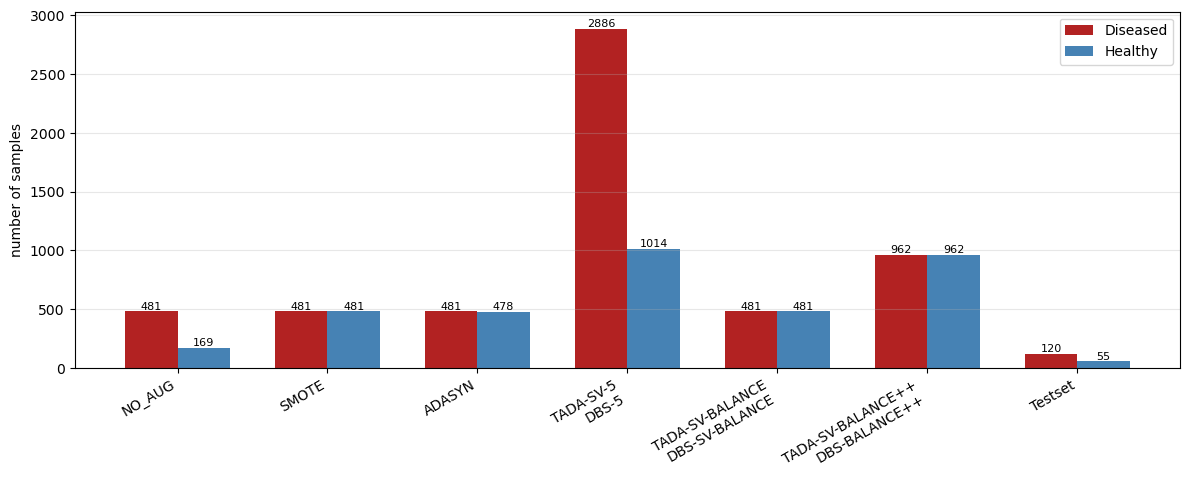

In [25]:
data = [
    {False: 481, True: 169},
    {False: 481, True: 481},
    {False: 481, True: 478},
    {False: 2886, True: 1014},
    {False: 481, True: 481},
    {False: 962, True: 962},
    {False: 120, True: 55},
]

labels = [
    "NO_AUG", "SMOTE", "ADASYN",
    "TADA-SV-5\nDBS-5", "TADA-SV-BALANCE\nDBS-SV-BALANCE", "TADA-SV-BALANCE++\nDBS-BALANCE++",
    "Testset"
]

# Werte extrahieren
healthy = [d[True] for d in data]
diseased = [d[False] for d in data]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 5))

bars1 = plt.bar(x - width/2, diseased, width,
                label="Diseased", color="firebrick")
bars2 = plt.bar(x + width/2, healthy, width,
                label="Healthy", color="steelblue")

# Zahlen über Balken
for bars in (bars1, bars2):
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h,
                 f"{int(h)}", ha="center", va="bottom", fontsize=8)

plt.xticks(x, labels, rotation=30, ha="right")
plt.ylabel("number of samples")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
def boxplot_metrics_by_classifier_two_cols(
    results: pd.DataFrame,
    metrics=("auc", "mcc"),
    ylims=([0.7, 0.95], [0.1, 0.7]),
    order=None,
    classifiers=("LR", "RF"),
    classifier_labels=("Logistic Regression", "Random Forest"),
    classifier_col="classifier",
    title="Performance across runs"
):
    # --- checks ---
    for col in [classifier_col, "method", *metrics]:
        if col not in results.columns:
            raise ValueError(
                f"'{col}' fehlt in results. Spalten: {results.columns.tolist()}"
            )

    if order is None:
        order = sorted(results["method"].unique())

    # ----------------------------
    # Farbzuordnung
    # ----------------------------
    def method_color(name: str):
        if name == "NO_AUG":
            return "#7F7F7F"      # grau
        elif name in ["SMOTE", "ADASYN"]:
            return "#E69F00"      # orange
        elif name.startswith("TADA"):
            return "#CC79A7"      # violett
        elif name.startswith("DBS"):
            return "#009E73"      # grün
        else:
            return "#999999"

    colors = [method_color(m) for m in order]

    # ----------------------------
    # Figure: rows=metrics, cols=classifiers
    # ----------------------------
    n_rows = len(metrics)
    n_cols = len(classifiers)

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(max(12, 0.6 * len(order)), 3.2 * n_rows),
        sharex=True
    )
    axes = np.atleast_2d(axes)

    # ----------------------------
    # Plot
    # ----------------------------
    for r, (metric, ylim) in enumerate(zip(metrics, ylims)):
        for c, (clf, clf_label) in enumerate(zip(classifiers, classifier_labels)):
            ax = axes[r, c]
            df_clf = results[results[classifier_col] == clf]

            data = [
                df_clf.loc[df_clf["method"] == m, metric].dropna().values
                for m in order
            ]

            bp = ax.boxplot(
                data,
                patch_artist=True,
                widths=0.6,
                showfliers=True
            )

            for patch, color in zip(bp["boxes"], colors):
                patch.set_facecolor(color)
                patch.set_edgecolor("black")
                patch.set_alpha(0.85)

            for element in ["whiskers", "caps", "medians"]:
                for item in bp[element]:
                    item.set_color("black")

            ax.set_ylim(ylim)
            ax.grid(axis="y", alpha=0.3)

            # Column titles only on top row
            if r == 0:
                ax.set_title(clf_label)

            # Row labels only on left column
            if c == 0:
                ax.set_ylabel(metric.upper())
            else:
                ax.set_ylabel("")

            # X tick labels only on bottom row
            if r == n_rows - 1:
                ax.set_xticks(np.arange(1, len(order) + 1))
                ax.set_xticklabels(order, rotation=45, ha="right")
            else:
                ax.set_xticks(np.arange(1, len(order) + 1))
                ax.set_xticklabels([])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

In [17]:
order_names = [
    "NO_AUG", "SMOTE", "ADASYN",
    "TADA-SV-5", "TADA-SV-BALANCE", "TADA-SV-BALANCE++",
    "DBS-5", "DBS-BALANCE", "DBS-BALANCE++"
]

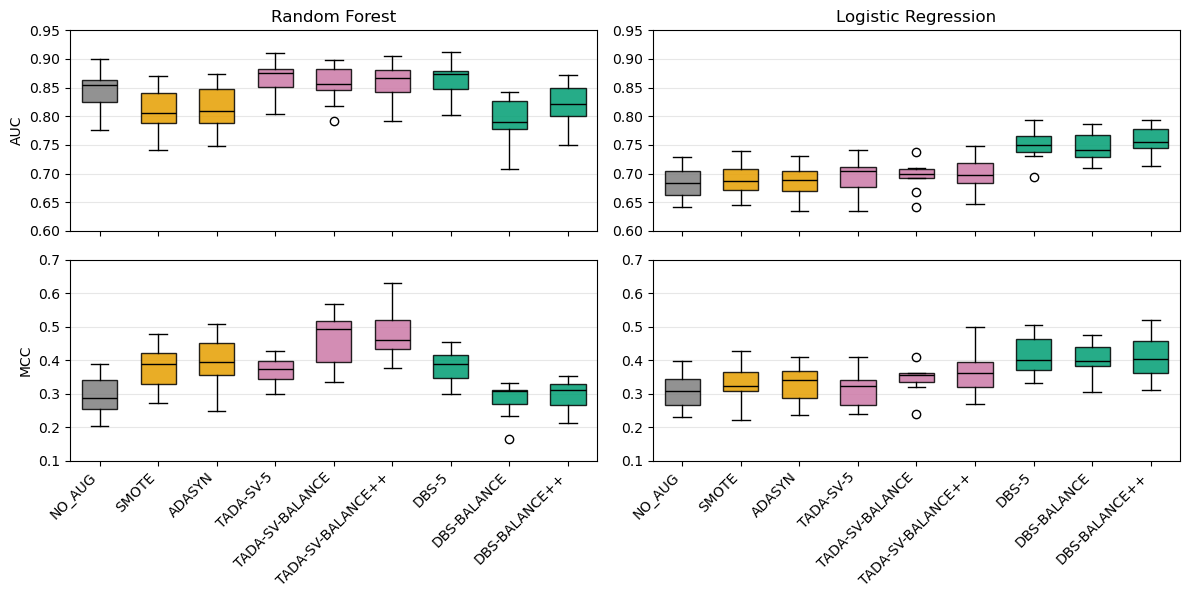

auc               mcc            
                                      mean   std count  mean   std count
model              method                                               
LogisticRegression NO_AUG             0.68  0.03    10  0.30  0.05    10
                   SMOTE              0.69  0.03    10  0.33  0.06    10
                   ADASYN             0.69  0.03    10  0.33  0.06    10
                   TADA-SV-5          0.70  0.03    10  0.31  0.05    10
                   TADA-SV-BALANCE    0.70  0.03    10  0.34  0.04    10
                   TADA-SV-BALANCE++  0.70  0.03    10  0.36  0.06    10
                   DBS-5              0.75  0.03    10  0.41  0.06    10
                   DBS-BALANCE        0.75  0.03    10  0.40  0.05    10
                   DBS-BALANCE++      0.76  0.03    10  0.42  0.07    10
RandomForest       NO_AUG             0.85  0.04    10  0.30  0.06    10
                   SMOTE              0.81  0.04    10  0.38  0.07    10
                   ADASYN             0.82  0.04    10  0.39  0.09    10
                   TADA-SV-5          0.87  0.03    10  0.37  0.05    10
                   TADA-SV-BALANCE    0.86  0.03    10  0.46  0.08    10
                   TADA-SV-BALANCE++  0.86  0.03    10  0.48  0.08    10
                   DBS-5              0.87  0.03    10  0.38  0.05    10
                   DBS-BALANCE        0.79  0.04    10  0.28  0.05    10
                   DBS-BALANCE++      0.82  0.04    10  0.30  0.05    10

In [ ]:
rf_results = csv_results = pd.read_csv("../results/02_experiment/moderate_imbalance/e2_rf_moderate_results.csv")
lr_results = csv_results = pd.read_csv("../results/02_experiment/moderate_imbalance/e2_lr_moderate_results.csv")

results = pd.concat([rf_results, lr_results], ignore_index=True)

boxplot_metrics_by_classifier_two_cols(
    results,
    order=order_names,
    classifier_col="model",
    classifiers=("RandomForest", "LogisticRegression"),
    classifier_labels=("Random Forest", "Logistic Regression"),
    metrics=("auc", "mcc"),
    ylims=([0.6, 0.95], [0.1, 0.7]),
)

summary = (
    results
    .groupby(["model", "method"])[["auc", "mcc"]]
    .agg(["mean", "std", "count"])
)

summary = summary.reindex(order_names, level="method")

summary.round(2)

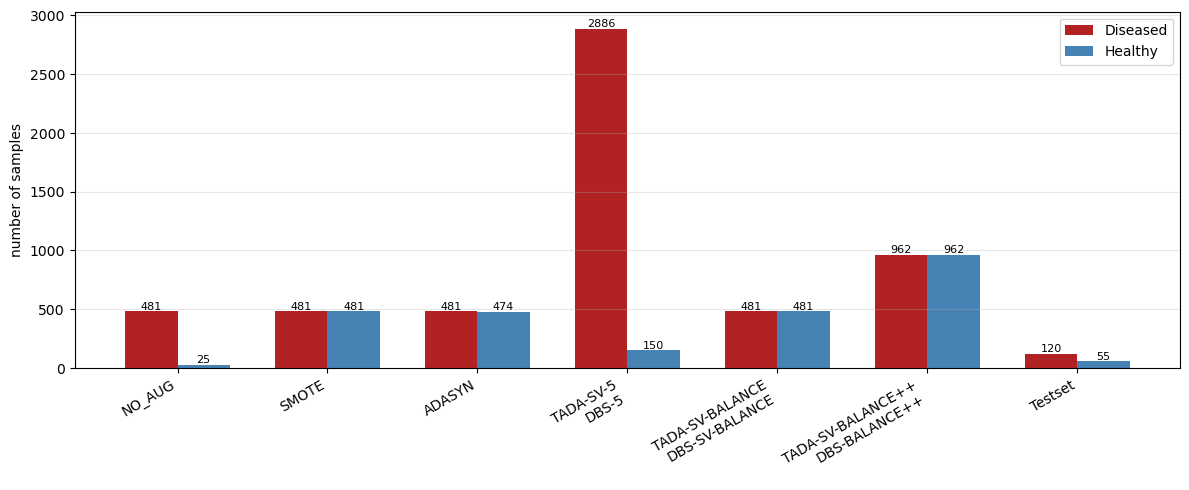

In [24]:
data = [
    {False: 481, True: 25},
    {False: 481, True: 481},
    {False: 481, True: 474},
    {False: 2886, True: 150},
    {False: 481, True: 481},
    {False: 962, True: 962},
    {False: 120, True: 55},
]

labels = [
    "NO_AUG", "SMOTE", "ADASYN",
    "TADA-SV-5\nDBS-5", "TADA-SV-BALANCE\nDBS-SV-BALANCE", "TADA-SV-BALANCE++\nDBS-BALANCE++",
    "Testset"
]

# Werte extrahieren
healthy = [d[True] for d in data]
diseased = [d[False] for d in data]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12, 5))

bars1 = plt.bar(x - width/2, diseased, width,
                label="Diseased", color="firebrick")
bars2 = plt.bar(x + width/2, healthy, width,
                label="Healthy", color="steelblue")

# Zahlen über Balken
for bars in (bars1, bars2):
    for bar in bars:
        h = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, h,
                 f"{int(h)}", ha="center", va="bottom", fontsize=8)

plt.xticks(x, labels, rotation=30, ha="right")
plt.ylabel("number of samples")
plt.legend()
plt.grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

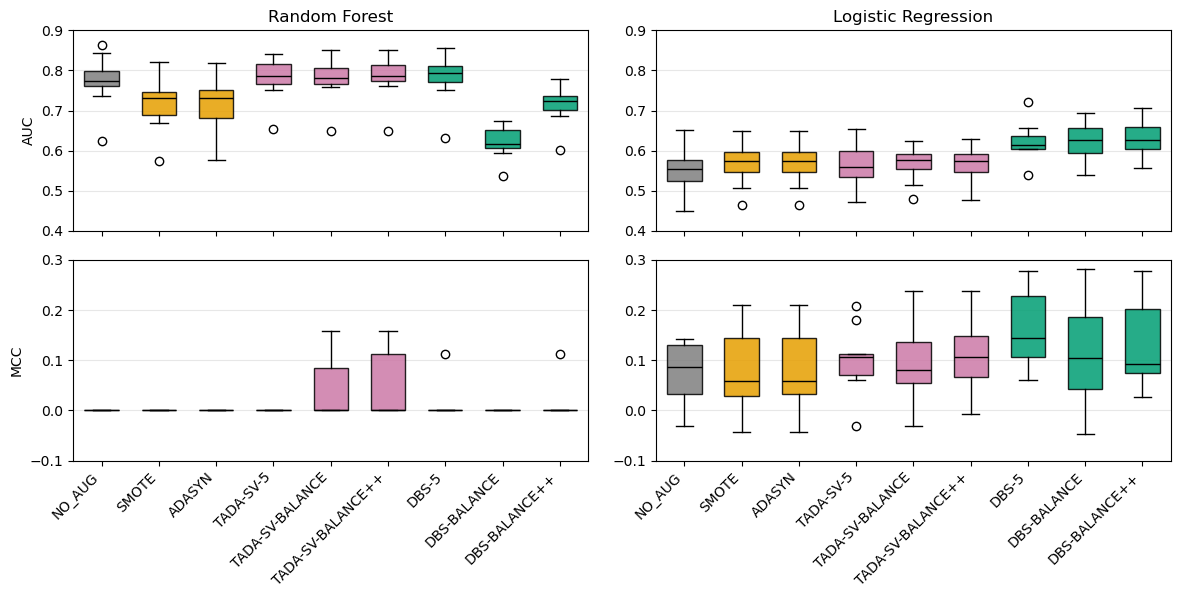

auc               mcc            
                                      mean   std count  mean   std count
model              method                                               
LogisticRegression NO_AUG             0.55  0.05    10  0.07  0.06    10
                   SMOTE              0.57  0.05    10  0.08  0.08    10
                   ADASYN             0.57  0.05    10  0.08  0.08    10
                   TADA-SV-5          0.56  0.05    10  0.10  0.07    10
                   TADA-SV-BALANCE    0.57  0.04    10  0.09  0.08    10
                   TADA-SV-BALANCE++  0.57  0.04    10  0.11  0.08    10
                   DBS-5              0.62  0.05    10  0.16  0.08    10
                   DBS-BALANCE        0.62  0.05    10  0.11  0.10    10
                   DBS-BALANCE++      0.63  0.05    10  0.13  0.09    10
RandomForest       NO_AUG             0.77  0.06    10  0.00  0.00    10
                   SMOTE              0.72  0.07    10  0.00  0.00    10
                   ADASYN             0.72  0.07    10  0.00  0.00    10
                   TADA-SV-5          0.78  0.05    10  0.00  0.00    10
                   TADA-SV-BALANCE    0.78  0.06    10  0.04  0.06    10
                   TADA-SV-BALANCE++  0.78  0.05    10  0.05  0.07    10
                   DBS-5              0.78  0.06    10  0.01  0.04    10
                   DBS-BALANCE        0.62  0.04    10  0.00  0.00    10
                   DBS-BALANCE++      0.71  0.05    10  0.01  0.04    10

In [ ]:
rf_results = csv_results = pd.read_csv("../results/02_experiment/strong_imbalance/e2_rf_strong_results.csv")
lr_results = csv_results = pd.read_csv("../results/02_experiment/strong_imbalance/e2_lr_strong_results.csv")

results = pd.concat([rf_results, lr_results], ignore_index=True)

boxplot_metrics_by_classifier_two_cols(
    results,
    order=order_names,
    classifier_col="model",
    classifiers=("RandomForest", "LogisticRegression"),
    classifier_labels=("Random Forest", "Logistic Regression"),
    metrics=("auc", "mcc"),
    ylims=([0.4, 0.90], [-0.1, 0.3]),
)

summary = (
    results
    .groupby(["model", "method"])[["auc", "mcc"]]
    .agg(["mean", "std", "count"])
)

summary = summary.reindex(order_names, level="method")

summary.round(2)